<a href="https://colab.research.google.com/github/krtonga/NickRizzo/blob/master/ibasho_viridian_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown

In [66]:
from google.colab import auth
import gspread
from google.auth import default

#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [67]:
#defining my worksheet
worksheet = gc.open('Ibasho/Viridian - Anonymous Temperature Check (Responses)').sheet1

#get_all_values gives a list of rows
rows = worksheet.get_all_values()

#Convert to a DataFrame 
results = pd.DataFrame(rows)

#creating columns name
results.columns = results.iloc[0]
results = results.iloc[1:]

In [68]:
# define column names and hints in tuple
damaging = ('How damaging to you was what happened between February 2020 and your group houses end while it was happening?', '-5 (worst thing in my life) to 5 (best thing in my life); 0 is no damage.')
damage_now = ('How much of that damage are you still carrying with you?', '-5 (still just as bad) to 5 (learned so many lessons and my life is vastly improved); 0 is no damage.')
understanding = ('How much do you feel like you "understand" what happened?\n','-5 (none) to 5 (crystal clear)')
talk = ('How much do you want to "talk about it"?','-5 (hell no! that would hurt me) to 5 (great need!)')
enjoy = ('How much do you want to just chill out and enjoy eachothers company?','-5 (hell no! why?) to 5 (this is all I want and I want it a lot!)')
close = ('How close are you to the members of this "group" now?','-5 (no connection) to 5 (really, really close! same as before or better)')
closer = ('Do you wish you were closer?','-5 (hell no) to 5 (great need!)')
socially_satisfied = ('How socially satisfied are you with your life now?',"-5 (it's really bad) to 5 (it's really great)")
social_difference = ('How different is this (social satisfaction) compared to the beginning of 2020?','-5 (way way worse) to 5 (way way better)')
wellbeing = ('In comparison to yourself, how are you doing? (generally/this month)',"-5 (really bad) to 5 (better than I've ever been)")
precovid = ('How different is this (general wellbeing) compared to pre-pandemic?','-5 (way way worse) to 5 (way way better)')

# convert column responses into ints (they come in as strings from Google Sheets)
def convert_str_to_ints(tuple_arr):
  for tuple in tuple_arr:
    results[tuple[0]] = results[tuple[0]].astype(int)
convert_str_to_ints([damaging, damage_now, understanding, talk, enjoy, close, closer, socially_satisfied, social_difference, wellbeing, precovid])

# calculate damage diff
damage_dif = ('Damage difference','Calculated based on answers. The outlier (-3) is from someone who pointed initial damage as 2 and amount still carried as -1.')
results[damage_dif[0]] = ((results[damage_now[0]] + 5) - (results[damaging[0]] + 5))

In [69]:
#display(results)

In [122]:
def add_answers(value_counts, num):
    arr = []
    if (num in value_counts):
        arr += value_counts[num] * [num]
    return arr

def chart_results(title_tuple):
    title, hint = title_tuple
    
    display(Markdown('### '+title))
    print(hint)
    
    value_counts = results[title].value_counts()
    #print(value_counts)
    
    # sets number of bars and range of x axis
    bins = np.linspace(-5, 5, 12)

    # to set the color of each bar, each bar must be added seperately
    neg5s=add_answers(value_counts, -5)
    neg4s=add_answers(value_counts, -4)
    neg3s=add_answers(value_counts, -3)
    neg2s=add_answers(value_counts, -2)
    neg1s=add_answers(value_counts, -1)
    zeros=add_answers(value_counts, 0)
    pos1s=add_answers(value_counts, 1)
    pos2s=add_answers(value_counts, 2)
    pos3s=add_answers(value_counts, 3)
    pos4s=add_answers(value_counts, 4)
    pos5s=add_answers(value_counts, 5)

    counts, edges, bars = plt.hist(neg5s, bins, color = 'red', edgecolor='white', label='-5')
    arr = plt.hist(neg4s, bins, color = 'orangered', edgecolor='white', label='-4')
    plt.hist(neg3s, bins, color = 'darkorange', edgecolor='white', label='-3')
    plt.hist(neg2s, bins, color = 'orange', edgecolor='white', label='-2')
    plt.hist(neg1s, bins, color = 'gold', edgecolor='white', label='-1')
    plt.hist(zeros, bins, color = 'yellow', edgecolor='white', label='0')
    plt.hist(pos1s, bins, color = 'lime', edgecolor='white', label='1')
    plt.hist(pos2s, bins, color = 'limegreen', edgecolor='white', label='2')
    plt.hist(pos3s, bins, color = 'seagreen', edgecolor='white', label='3')
    plt.hist(pos4s, bins, color = 'green', edgecolor='white', label='4')
    plt.hist(pos5s, bins, color = 'darkgreen', edgecolor='white', label='5')

    plt.margins(x=0.01, y=0.1)
    plt.legend()
    
    # sets the counts on the top of the bars
    arr[0][0]=len(neg5s)
    arr[0][1]=len(neg4s)
    arr[0][2]=len(neg3s)
    arr[0][3]=len(neg2s)
    arr[0][4]=len(neg1s)
    arr[0][5]=len(zeros)
    arr[0][6]=len(pos1s)
    arr[0][7]=len(pos2s)
    arr[0][8]=len(pos3s)
    arr[0][9]=len(pos4s)
    arr[0][10]=len(pos5s)
    # requires matplotlib 3.4+ but GoogleColab max is currently 2.2
    # print('matplotlib: {}'.format(matplotlib.__version__))
    # plt.bar_label(arr[0])
    for i in range(11):
      plt.text(arr[1][i],arr[0][i],"    "+str(int(arr[0][i])))
    
    # sets the x axis labels
    plt.xticks(range(-5,5))

    # displays the chart. "Best" changes the legend location to fit the data.  
    plt.show('best')

### How damaging to you was what happened between February 2020 and your group houses end while it was happening?

-5 (worst thing in my life) to 5 (best thing in my life); 0 is no damage.


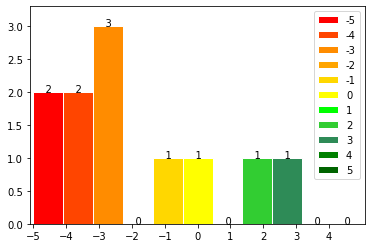

### How much of that damage are you still carrying with you?

-5 (still just as bad) to 5 (learned so many lessons and my life is vastly improved); 0 is no damage.


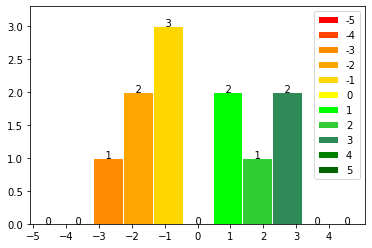

### Damage difference

Calculated based on answers. The outlier (-3) is from someone who pointed initial damage as 2 and amount still carried as -1.


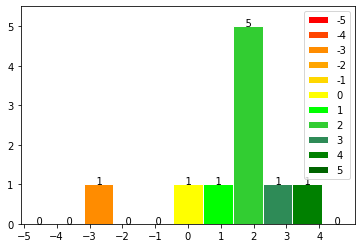

### How much do you feel like you "understand" what happened?


-5 (none) to 5 (crystal clear)


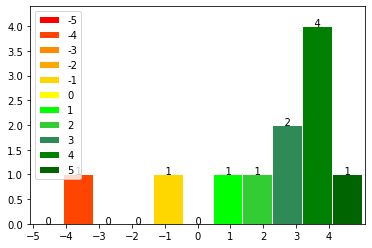

### How much do you want to "talk about it"?

-5 (hell no! that would hurt me) to 5 (great need!)


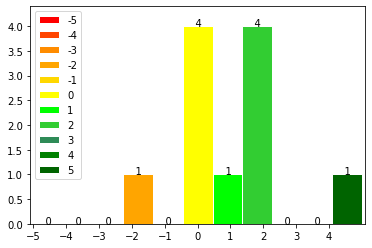

### How much do you want to just chill out and enjoy eachothers company?

-5 (hell no! why?) to 5 (this is all I want and I want it a lot!)


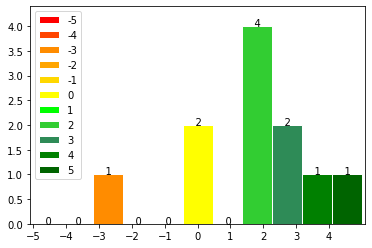

### How close are you to the members of this "group" now?

-5 (no connection) to 5 (really, really close! same as before or better)


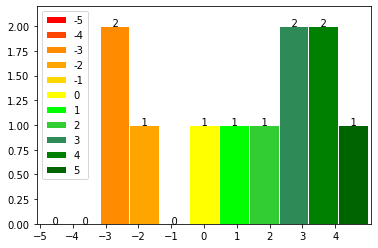

### Do you wish you were closer?

-5 (hell no) to 5 (great need!)


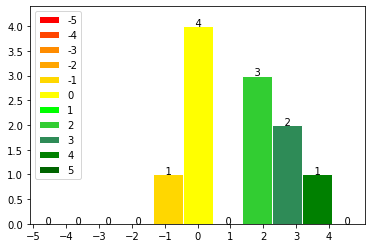

### How socially satisfied are you with your life now?

-5 (it's really bad) to 5 (it's really great)


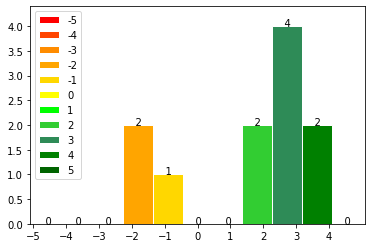

### How different is this (social satisfaction) compared to the beginning of 2020?

-5 (way way worse) to 5 (way way better)


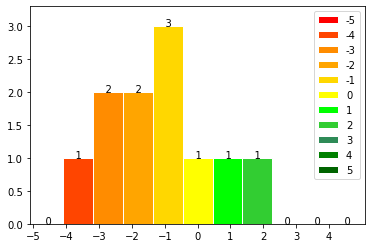

### In comparison to yourself, how are you doing? (generally/this month)

-5 (really bad) to 5 (better than I've ever been)


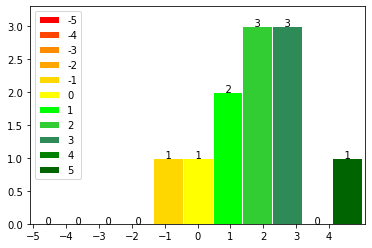

### How different is this (general wellbeing) compared to pre-pandemic?

-5 (way way worse) to 5 (way way better)


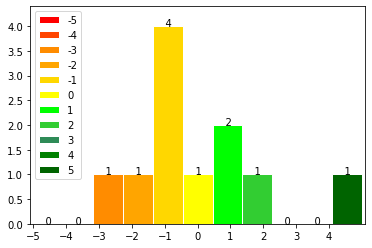

In [123]:
chart_results(damaging)
chart_results(damage_now)
chart_results(damage_dif)
chart_results(understanding)
chart_results(talk)
chart_results(enjoy)
chart_results(close)
chart_results(closer)
chart_results(socially_satisfied)
chart_results(social_difference)
chart_results(wellbeing)
chart_results(precovid)